<h1>Results</h1>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from PIL import Image
import gzip
import pickle as cp
import glob

<h2>Permuted MNIST </h2>

<h3> Comparison of VCL (with/without coreset) and for different coreset methods </h3>

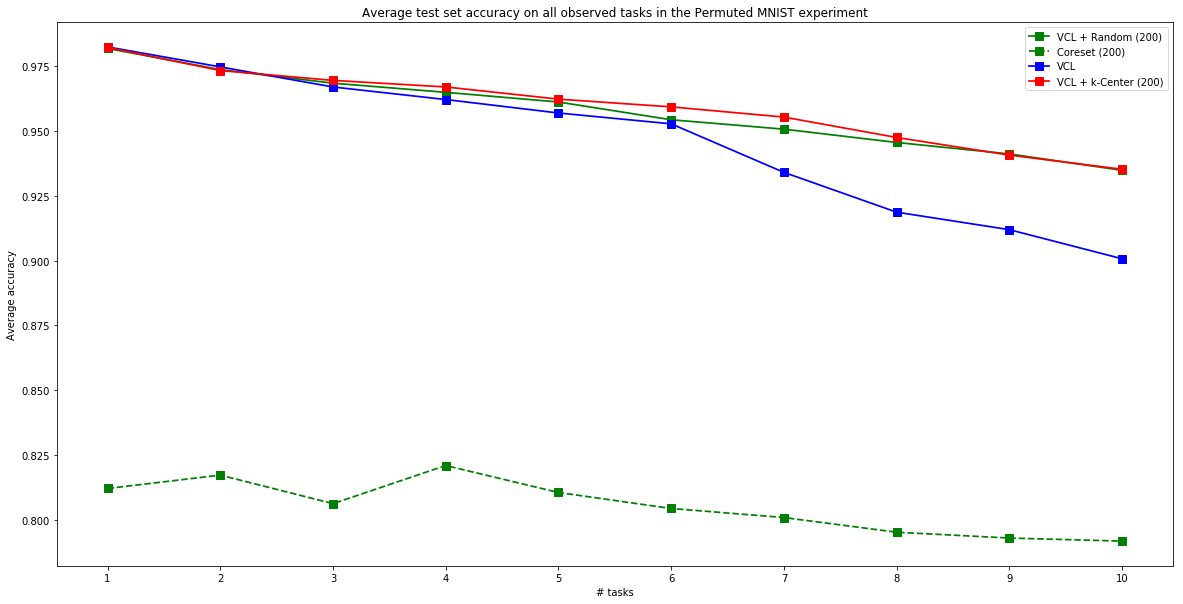

In [4]:
directory = "discriminative/final_results/"
directory_files = sorted(glob.glob(directory + "rand-VCL*.npy"))
fig = plt.figure(figsize=(20,10))
ax = plt.gca()
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['lines.linewidth'] = 1.75

coreset_size = 200

file_name = "rand-VCL-{}.npy".format(coreset_size)
label = 'VCL + Random ({})'.format(coreset_size)
acc_file = np.load(directory + file_name)
acc_mean_file = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, color ="g" ,marker='s')

file_coreset_name = "only-coreset-{}.npy".format(coreset_size)
label_coreset = 'Coreset ({})'.format(coreset_size)
acc_coreset_file = np.load(directory + file_coreset_name)
acc_mean_coreset_file = np.nanmean(acc_coreset_file, 1)
plt.plot(np.arange(len(acc_mean_coreset_file))+1, acc_mean_coreset_file, label = label_coreset, color="g", linestyle = "--",  marker='s')


file_name = "VCL.npy"
acc_file = np.load(directory + file_name)
acc_mean = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean))+1, acc_mean, label="VCL", color = "b", marker='s')


file_name =  "kcen-VCL-200.npy"
acc_file = np.load(directory + file_name)
acc_mean = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean))+1, acc_mean, label="VCL + k-Center (200)", color = "r", marker='s')
    
ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
ax.legend()
plt.title("Average test set accuracy on all observed tasks in the Permuted MNIST experiment")
plt.show()


<h3>Comparison of the effect of coreset sizes in the Permuted MNIST experiment</h3>

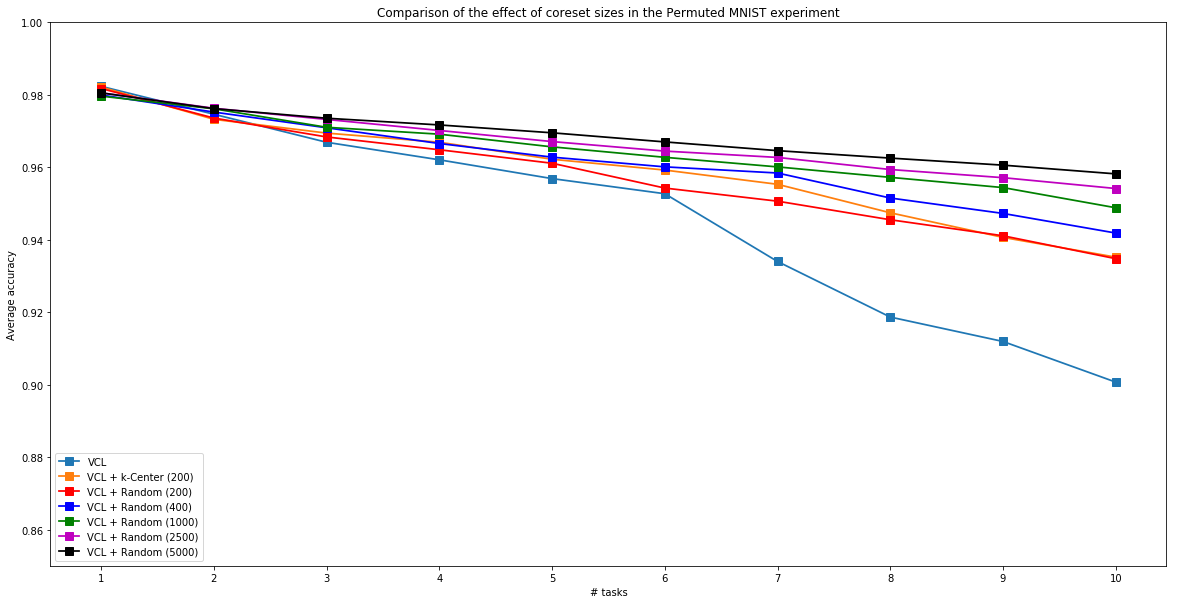

In [6]:
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['lines.linewidth'] = 1.75
directory = "discriminative/final_results/"
directory_files = sorted(glob.glob(directory + "rand-VCL*.npy"))
fig = plt.figure(figsize=(20,10))
ax = plt.gca()

coreset_sizes = []
for file in directory_files:
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]
    coreset_sizes.append(coreset_size)

file_name = "VCL.npy"
acc_file = np.load(directory + file_name)
acc_mean = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean))+1, acc_mean, label="VCL", marker='s')


file_name =  "kcen-VCL-200.npy"
acc_file = np.load(directory + file_name)
acc_mean = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean))+1, acc_mean, label="VCL + k-Center (200)", marker='s')


coreset_sizes = sorted(list(map(int,coreset_sizes)))
color_coresets = ["r","b","g", "m", "black"]
for i, coreset_size in enumerate(coreset_sizes):
    color_coreset  = color_coresets[i]
    file_name = "rand-VCL-{}.npy".format(coreset_size)
    label = 'VCL + Random ({})'.format(coreset_size)
    acc_file = np.load(directory + file_name)
    acc_mean_file = np.nanmean(acc_file, 1)
    plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, color =color_coreset ,marker='s')

    #file_coreset_name = "only-coreset-{}.npy".format(coreset_size)
    #label_coreset = 'Coreset ({})'.format(coreset_size)
    #acc_coreset_file = np.load(directory + file_coreset_name
    #acc_mean_coreset_file = np.nanmean(acc_coreset_file, 1)
    #plt.plot(np.arange(len(acc_mean_coreset_file))+1, acc_mean_coreset_file, label=label_coreset, linestyle = "--", color=color_coreset, marker='s')


ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
plt.ylim(0.85,1.0)
ax.legend(loc = 'lower left')
plt.title("Comparison of the effect of coreset sizes in the Permuted MNIST experiment")
plt.show()


<h2>Split MNIST</h2>

In [7]:
directory = "discriminative/results/"
directory_files = sorted(glob.glob(directory + "*-split.npy"))
VCL_split = np.load(directory+"VCL-split.npy")
randVCL_split = np.load(directory+"randVCL-split.npy")
kcenVCL_split = np.load(directory+"kcenVCL-split.npy")
kcen_coreset_only_split = np.load(directory+"kcen-coreset-only-split.npy")
rand_coreset_only_split =  np.load(directory+"rand-coreset-only-split.npy")
PCA_VCL_split =  np.load(directory+"pca-kcenVCL-split.npy")
PCA_coreset_only_split =  np.load(directory+"pca-kcen-coreset-only-split.npy")


VGR_split =  np.load(directory+"VGR-split.npy")

#Generative_only_split =  np.load(directory+"generative-coreset-only-split.npy")

<h3> Comparison of VCL (with/without coreset) and for different coreset methods </h3>

<Figure size 432x288 with 0 Axes>

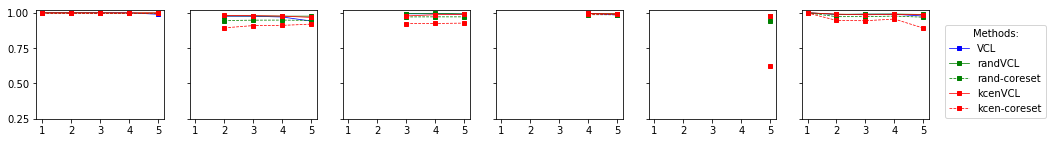

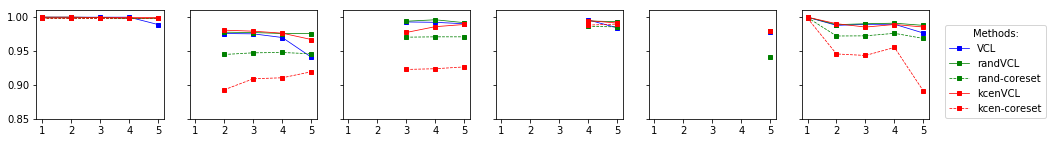

In [8]:
x = np.arange(1,6)
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 6, figsize=(16,2), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 6, figsize=(16,2), sharex=True,
                                                        sharey=True)
for i in range(5):
    ax1[i].plot(x[i:], VCL_split[i:,i], color = "b", marker = "s")
    ax1[i].plot(x[i:], randVCL_split[i:,i],color = "g", marker = "s")
    ax1[i].plot(x[i:], rand_coreset_only_split[i:,i], color = "g", linestyle="--",marker = "s")
    ax1[i].plot(x[i:], kcenVCL_split[i:,i], color = "r", marker = "s")
    ax1[i].plot(x[i:], kcen_coreset_only_split[i:,i], color = "r", linestyle="--", marker = "s")

    #ax1[i].plot(x[i:], Generative_only_split[i:,i], color = "darkviolet", linestyle="--", marker = "s")

    ax2[i].plot(x[i:], VCL_split[i:,i],color = "b", marker = "s")
    ax2[i].plot(x[i:], randVCL_split[i:,i],color = "g", marker = "s")
    ax2[i].plot(x[i:], rand_coreset_only_split[i:,i], color = "g", linestyle="--",marker = "s")
    ax2[i].plot(x[i:], kcenVCL_split[i:,i], color = "r",marker = "s")
    ax2[i].plot(x[i:], kcen_coreset_only_split[i:,i], color = "r", linestyle="--", marker = "s")

    #ax2[i].plot(x[i:], Generative_only_split[i:,i], color = "darkviolet", linestyle="--", marker = "s")



ax1[-1].plot(x, np.nanmean(VCL_split,1), color = "b", marker = "s")
ax1[-1].plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax1[-1].plot(x, np.nanmean(rand_coreset_only_split,1), color = "g", linestyle="--", marker = "s")
ax1[-1].plot(x, np.nanmean(kcenVCL_split,1), color = "r", marker = "s")
ax1[-1].plot(x, np.nanmean(kcen_coreset_only_split,1),color = "r", linestyle="--",marker = "s")

#ax1[-1].plot(x, np.nanmean(Generative_only_split,1),color = "darkviolet", linestyle="--",marker = "s")


ax2[-1].plot(x, np.nanmean(VCL_split,1), color = "b", marker = "s")
ax2[-1].plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax2[-1].plot(x, np.nanmean(rand_coreset_only_split,1), color = "g", linestyle="--", marker = "s")
ax2[-1].plot(x, np.nanmean(kcenVCL_split,1), color = "r", marker = "s")
ax2[-1].plot(x, np.nanmean(kcen_coreset_only_split,1),color = "r", linestyle="--",marker = "s")

#ax2[-1].plot(x, np.nanmean(Generative_only_split,1),color = "darkviolet", linestyle="--",marker = "s")

#plt.figlegend(["VCL", "randVCL", "kcenVCL"],loc = "upper center")




for i in range(6):
    ax1[i].set_xticks(np.arange(1, 6, 1))
    ax1[i].set_yticks(np.arange(0.25, 1.25, 0.25))
    ax2[i].set_xticks(np.arange(1, 6, 1))
    ax2[i].set_yticks(np.arange(0.85, 1.01, 0.05))
    plt.ylim(0.85,1.01)
    
g.legend(   # The line objects
           labels=["VCL", "randVCL","rand-coreset", "kcenVCL", "kcen-coreset"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Methods:"  # Title for the legend
           )
h.legend(   # The line objects
           labels=["VCL", "randVCL","rand-coreset", "kcenVCL", "kcen-coreset"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Methods:"  # Title for the legend
           )



<h3> Comparison of random coreset VCL (40) and VGR (6000) </h3>

Text(0.5, 1.0, 'Comparison of random coreset VCL (40) and VGR (6000)')

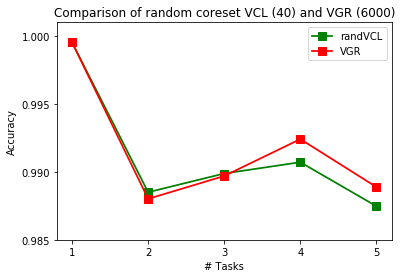

In [6]:
x = np.arange(1,6)
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['lines.linewidth'] = 1.75

ax = plt.gca()

ax.plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax.plot(x, np.nanmean(VGR_split,1), color = "red", marker = "s")


ax.set_xticks(np.arange(1, 6, 1))
ax.set_yticks(np.arange(0.985, 1.01, 0.005))
plt.xlabel("# Tasks")
plt.ylabel("Accuracy")
plt.ylim(0.985,1.001)
plt.legend(["randVCL", "VGR"])
plt.title("Comparison of random coreset VCL (40) and VGR (6000)")


<h3>Pictures of GAN's generated coreset</h1>

<Figure size 432x288 with 0 Axes>

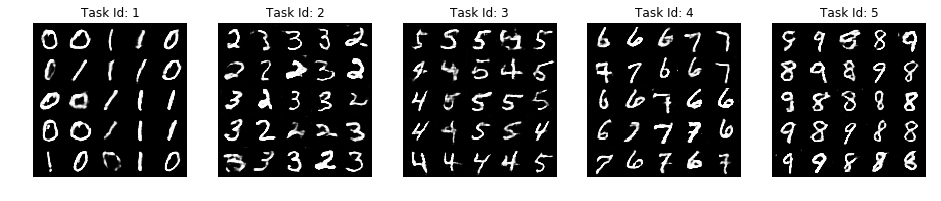

In [13]:
directory = "discriminative/misc/images/"
directory_files = sorted(glob.glob(directory + "*.png"))
plt.clf()
g, ax = plt.subplots(1, len(directory_files), figsize=(16,4), sharex=True,
                                                        sharey=True)
for i,files in enumerate(directory_files):
    image = Image.open(files).convert("L")
    arr = np.asarray(image)
    ax[i].imshow(arr,cmap="gray")
    ax[i].set_axis_off()
    ax[i].set_title("Task Id: {}".format(i+1))

plt.show()

<Figure size 432x288 with 0 Axes>

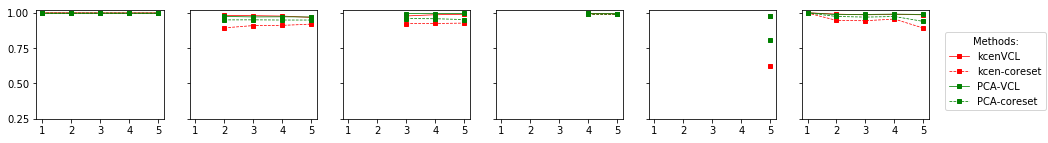

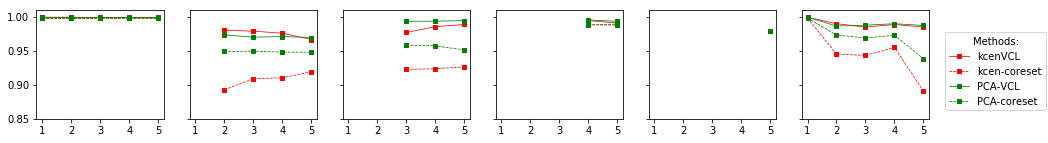

In [14]:
x = np.arange(1,6)
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 6, figsize=(16,2), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 6, figsize=(16,2), sharex=True,
                                                        sharey=True)
for i in range(5):

    ax1[i].plot(x[i:], kcenVCL_split[i:,i], color = "r", marker = "s")
    ax1[i].plot(x[i:], kcen_coreset_only_split[i:,i], color = "r", linestyle="--", marker = "s")
    ax1[i].plot(x[i:], PCA_VCL_split[i:,i], color = "g", marker = "s")
    ax1[i].plot(x[i:], PCA_coreset_only_split[i:,i], color = "g", linestyle="--",marker = "s")

    ax2[i].plot(x[i:], kcenVCL_split[i:,i], color = "r",marker = "s")
    ax2[i].plot(x[i:], kcen_coreset_only_split[i:,i], color = "r", linestyle="--", marker = "s")
    ax2[i].plot(x[i:], PCA_VCL_split[i:,i], color = "g", marker = "s")
    ax2[i].plot(x[i:], PCA_coreset_only_split[i:,i], color = "g", linestyle="--",marker = "s")


ax1[-1].plot(x, np.nanmean(kcenVCL_split,1), color = "r", marker = "s")
ax1[-1].plot(x, np.nanmean(kcen_coreset_only_split,1),color = "r", linestyle="--",marker = "s")
ax1[-1].plot(x, np.nanmean(PCA_VCL_split,1), color = "g",marker = "s")
ax1[-1].plot(x, np.nanmean(PCA_coreset_only_split,1), color = "g", linestyle="--",marker = "s")

ax2[-1].plot(x, np.nanmean(kcenVCL_split,1), color = "r", marker = "s")
ax2[-1].plot(x, np.nanmean(kcen_coreset_only_split,1),color = "r", linestyle="--",marker = "s")
ax2[-1].plot(x, np.nanmean(PCA_VCL_split,1), color = "g",marker = "s")
ax2[-1].plot(x, np.nanmean(PCA_coreset_only_split,1), color = "g", linestyle="--",marker = "s")


for i in range(6):
    ax1[i].set_xticks(np.arange(1, 6, 1))
    ax1[i].set_yticks(np.arange(0.25, 1.25, 0.25))
    ax2[i].set_xticks(np.arange(1, 6, 1))
    ax2[i].set_yticks(np.arange(0.85, 1.01, 0.05))
    plt.ylim(0.85,1.01)
    
g.legend(   # The line objects
           labels=["kcenVCL", "kcen-coreset",  "PCA-VCL","PCA-coreset"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Methods:"  # Title for the legendblack
           )
h.legend(   # The line objects
           labels=["kcenVCL", "kcen-coreset","PCA-VCL","PCA-coreset"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Methods:"  # Title for the legend
           )


<h1>Generative</h1>

In [6]:
torch_directory = "sandbox/results/"
tf_directory = "generative/results/"

<h2> MNIST Test Log Like </h2>

<Figure size 432x288 with 0 Axes>

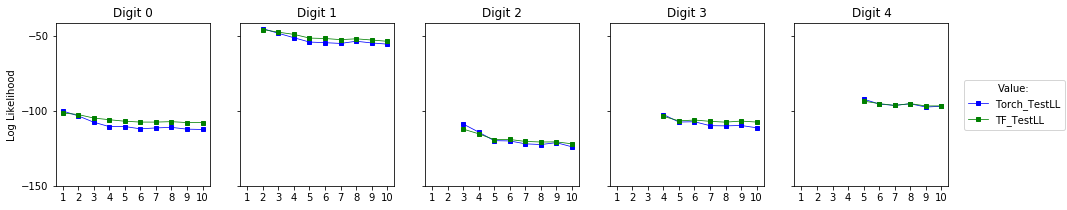

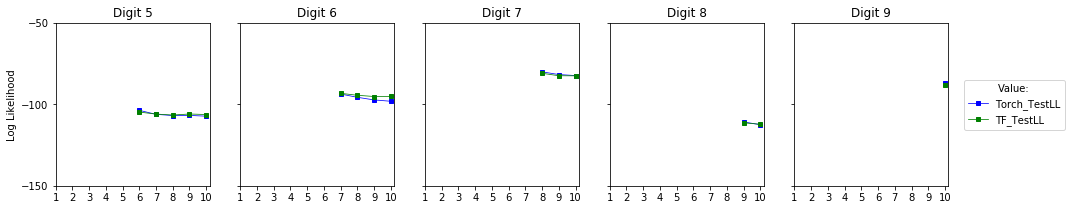

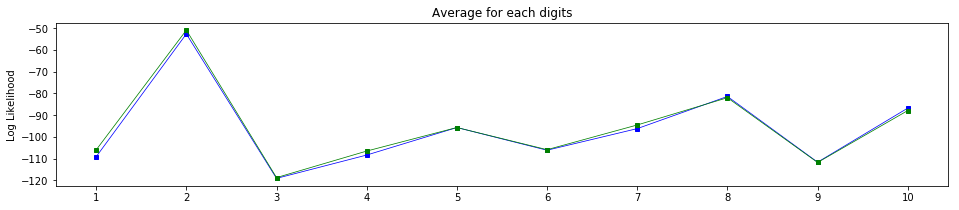

In [7]:
x = np.arange(1,11)

test_ll = np.load(torch_directory+"MNIST_results_TF_cla.npy")[0]
test_ll_tf = np.load(tf_directory+"mnist_TF.npy")[0]

mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
i, ax3  = plt.subplots(1, 1, figsize=(16,3), sharex=True,
                                                        sharey=True)

for i in range(5):

    ax1[i].plot(x[i:], test_ll[i:,i], color = "b", marker = "s")
    ax1[i].plot(x[i:], test_ll_tf[i:,i], color = "g", marker = "s")
    ax1[i].set_title("Digit " + str(i))
    j = i + 5
    ax2[i].plot(x[j:], test_ll[j:,j], color = "b",marker = "s")
    ax2[i].plot(x[j:], test_ll_tf[j:,j], color = "g",marker = "s")
    ax2[i].set_title("Digit " + str(j))
    
for i in range(5):
    ax1[i].set_xticks(np.arange(1, 11, 1))
    ax1[i].set_yticks(np.arange(-50, -151,-50))
    ax2[i].set_xticks(np.arange(1, 11, 1))
    ax2[i].set_yticks(np.arange(-50, -151,-50))
    
test_ll[test_ll == 0] = np.nan
test_ll_tf[test_ll_tf == 0] = np.nan

ax3.plot(x, np.nanmean(test_ll,0), color = "b", marker = "s")
ax3.plot(x, np.nanmean(test_ll_tf,0), color = "g", marker = "s")
ax3.set_title("Average for each digits")
ax3.set_ylabel("Log Likelihood")
ax3.set_xticks(np.arange(1,11,1))


ax1[0].set_ylabel("Log Likelihood")
ax2[0].set_ylabel("Log Likelihood")
    
g.legend(   # The line objects
           labels=["Torch_TestLL", "TF_TestLL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legendblack
           )
h.legend(   # The line objects
           labels=["Torch_TestLL", "TF_TestLL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legend
           )


<h2> MNIST TF Classifier KL </h2>

<Figure size 432x288 with 0 Axes>

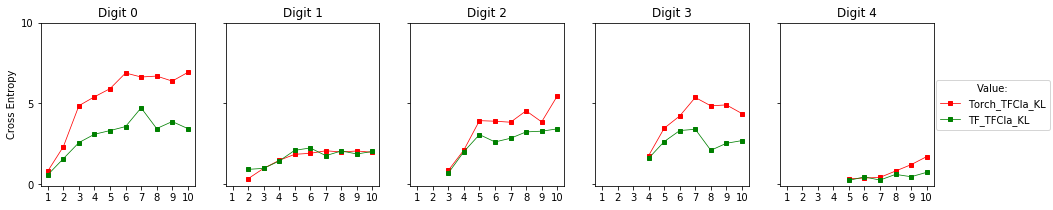

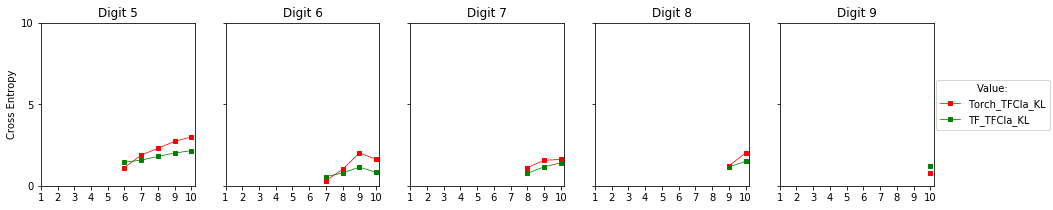

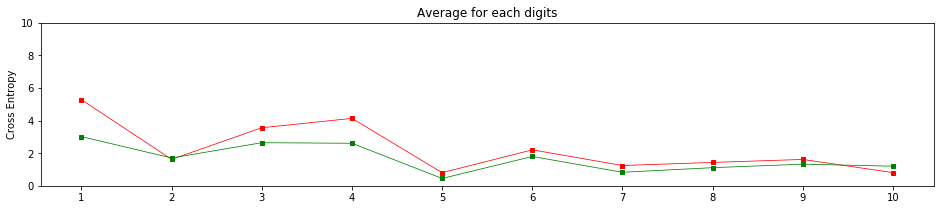

In [8]:
x = np.arange(1,11)

test_cla = np.load(torch_directory+"MNIST_results_TF_cla.npy")[1]
test_cla_tf = np.load(tf_directory+"mnist_TF.npy")[1]

mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
i, ax3  = plt.subplots(1, 1, figsize=(16,3), sharex=True,
                                                        sharey=True)

for i in range(5):

    ax1[i].plot(x[i:], test_cla[i:,i], color = "r", marker = "s")
    ax1[i].plot(x[i:], test_cla_tf[i:,i], color = "g", marker = "s")
    ax1[i].set_title("Digit " + str(i))

    j = i + 5
    ax2[i].plot(x[j:], test_cla[j:,j], color = "r",marker = "s")
    ax2[i].plot(x[j:], test_cla_tf[j:,j], color = "g", marker = "s")
    ax2[i].set_title("Digit " + str(j))

    

for i in range(5):
    ax1[i].set_xticks(np.arange(1, 11, 1))
    ax1[i].set_yticks(np.arange(0, 11, 5))
    plt.ylim(0,10)
    ax2[i].set_xticks(np.arange(1, 11, 1))
    ax2[i].set_yticks(np.arange(0, 11, 5))
    plt.ylim(0,10)
    
test_cla[test_cla == 0] = np.nan
test_cla_tf[test_cla_tf == 0] = np.nan    
    
ax3.plot(x, np.nanmean(test_cla,0), color = "r", marker = "s")
ax3.plot(x, np.nanmean(test_cla_tf,0), color = "g", marker = "s")
ax3.set_title("Average for each digits")
ax3.set_ylabel("Cross Entropy")
ax3.set_xticks(np.arange(1,11,1))    
    
    
ax1[0].set_ylabel("Cross Entropy")
ax2[0].set_ylabel("Cross Entropy")

    
g.legend(   # The line objects
           labels=["Torch_TFCla_KL", "TF_TFCla_KL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legendblack
           )
h.legend(   # The line objects
           labels=["Torch_TFCla_KL", "TF_TFCla_KL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legend
           )


<h2> NOTMNIST Test Log Like </h2>

<Figure size 432x288 with 0 Axes>

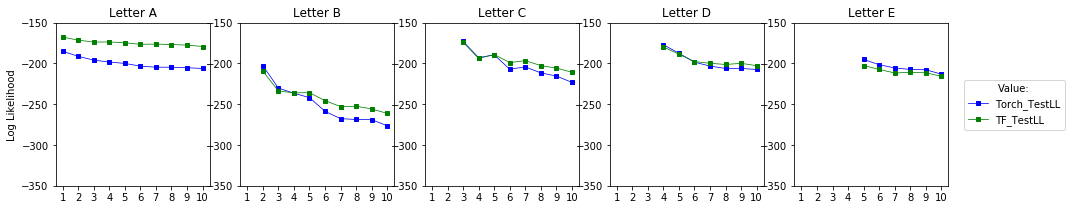

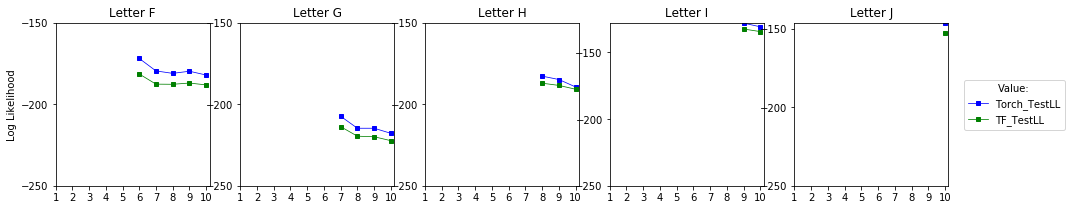

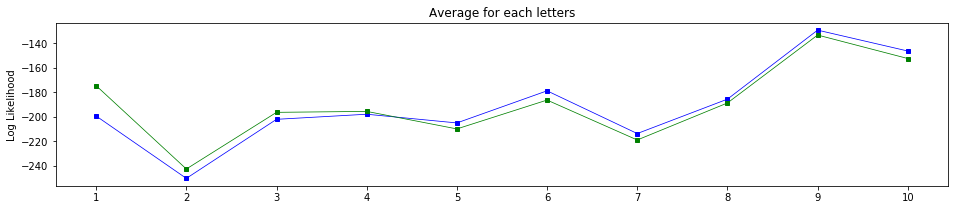

In [138]:
x = np.arange(1,11)

test_ll = eval(open('sandbox/notmnist_testll.txt',mode='r').read())
test_ll_tf = np.load(tf_directory+"notmnist_TF.npy")[0]

mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 5, figsize=(16,3), sharex=True)
h, ax2 = plt.subplots(1, 5, figsize=(16,3), sharex=True)
i, ax3  = plt.subplots(1, 1, figsize=(16,3), sharex=True,
                                                        sharey=True)

for i in range(5):

    ax1[i].plot(x[i:], test_ll[i], color = "b", marker = "s")
    ax1[i].plot(x[i:], test_ll_tf[i:,i], color = "g", marker = "s")
    ax1[i].set_title("Letter " + chr(ord('A') + i))

    j = i + 5
    ax2[i].plot(x[j:], test_ll[j], color = "b",marker = "s")
    ax2[i].plot(x[j:], test_ll_tf[j:,j], color = "g",marker = "s")
    ax2[i].set_title("Letter " + chr(ord('A') + j))

    
for i in range(5):
    ax1[i].set_xticks(np.arange(1, 11, 1))
    ax1[i].set_yticks(np.arange(-150, -351,-50))
    ax2[i].set_xticks(np.arange(1, 11, 1))
    ax2[i].set_yticks(np.arange(-150, -251,-50))

    
test_ll_tf[test_ll_tf == 0] = np.nan    

ax3.plot(x, [np.nanmean(x) for x in test_ll], color = "b", marker = "s")
ax3.plot(x, np.nanmean(test_ll_tf,0), color = "g", marker = "s")
ax3.set_title("Average for each letters")
ax3.set_ylabel("Log Likelihood")
ax3.set_xticks(np.arange(1,11,1)) 

ax1[0].set_ylabel("Log Likelihood")
ax2[0].set_ylabel("Log Likelihood")
    
g.legend(   # The line objects
           labels=["Torch_TestLL", "TF_TestLL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legendblack
           )
h.legend(   # The line objects
           labels=["Torch_TestLL", "TF_TestLL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legend
           )


<h2> NOTMNIST TF Classifier KL </h2>

<Figure size 432x288 with 0 Axes>

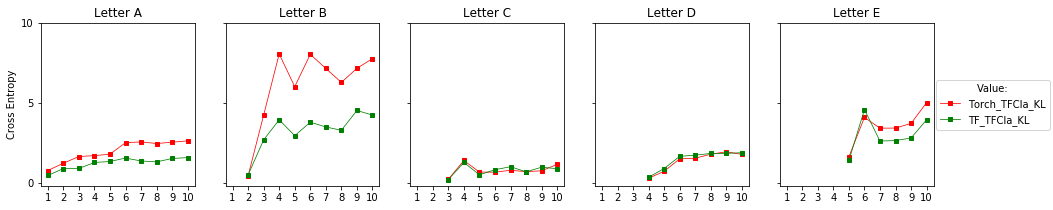

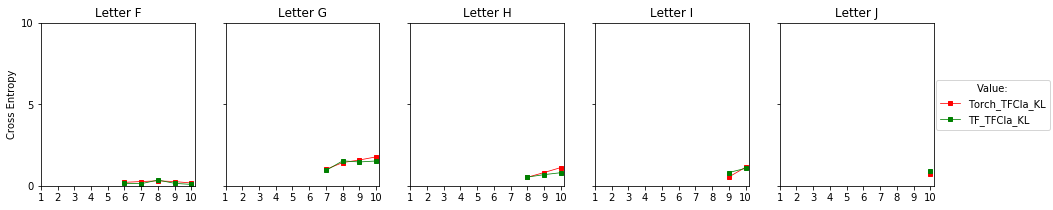

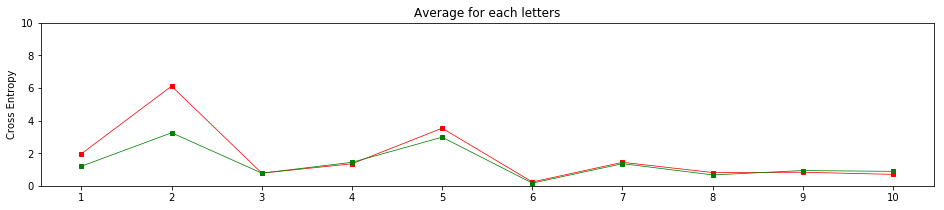

In [137]:
x = np.arange(1,11)


test_cla = np.load(torch_directory+"NOTMNIST_results_TF_cla.npy")[1]
test_cla_tf = np.load(tf_directory+"notmnist_TF.npy")[1]

mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
i, ax3  = plt.subplots(1, 1, figsize=(16,3), sharex=True,
                                                        sharey=True)
for i in range(5):

    ax1[i].plot(x[i:], test_cla[i:,i], color = "r", marker = "s")
    ax1[i].plot(x[i:], test_cla_tf[i:,i], color = "g", marker = "s")
    ax1[i].set_title("Letter " + chr(ord('A') + i))

    j = i + 5
    ax2[i].plot(x[j:], test_cla[j:,j], color = "r",marker = "s")
    ax2[i].plot(x[j:], test_cla_tf[j:,j], color = "g", marker = "s")
    ax2[i].set_title("Letter " + chr(ord('A') + j))
    

for i in range(5):
    ax1[i].set_xticks(np.arange(1, 11, 1))
    ax1[i].set_yticks(np.arange(0, 11, 5))
    plt.ylim(0,10)
    ax2[i].set_xticks(np.arange(1, 11, 1))
    ax2[i].set_yticks(np.arange(0, 11, 5))
    plt.ylim(0,10)
    
ax1[0].set_ylabel("Cross Entropy")
ax2[0].set_ylabel("Cross Entropy")


test_cla[test_cla == 0] = np.nan
test_cla_tf[test_cla_tf == 0] = np.nan

ax3.plot(x, np.nanmean(test_cla,0), color = "r", marker = "s")
ax3.plot(x, np.nanmean(test_cla_tf,0), color = "g", marker = "s")
ax3.set_title("Average for each letters")
ax3.set_ylabel("Cross Entropy")
ax3.set_xticks(np.arange(1,11,1))  
    
g.legend(   # The line objects
           labels=["Torch_TFCla_KL", "TF_TFCla_KL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legendblack
           )
h.legend(   # The line objects
           labels=["Torch_TFCla_KL", "TF_TFCla_KL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legend
           )


<h2> Extension on MNIST LL </h2>

<Figure size 432x288 with 0 Axes>

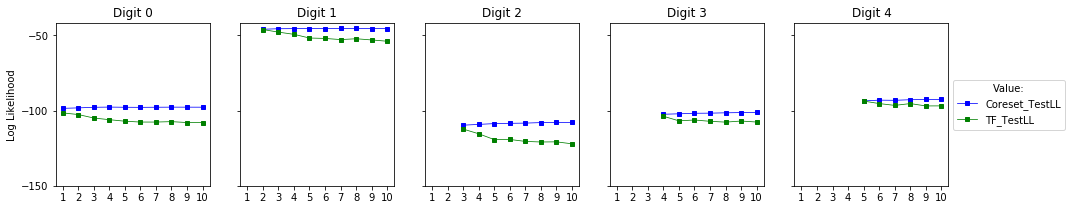

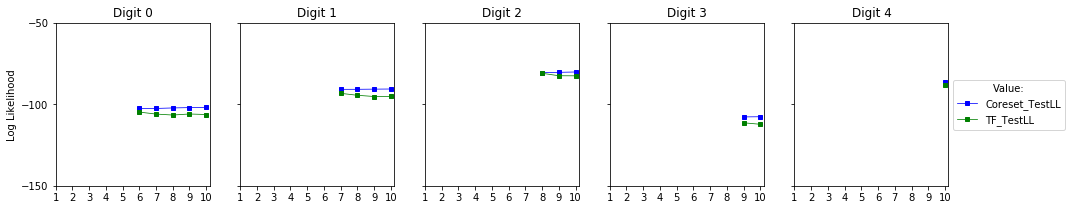

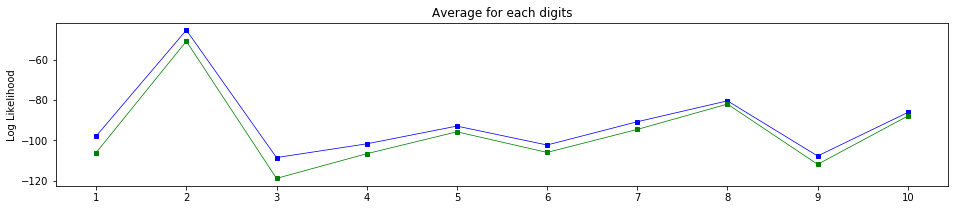

In [21]:
x = np.arange(1,11)

test_ll = eval(open('coreset_testLL.txt',mode='r').read())
test_ll_tf = np.load(tf_directory+"mnist_TF.npy")[0]

mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
i, ax3  = plt.subplots(1, 1, figsize=(16,3), sharex=True,
                                                        sharey=True)

for i in range(5):

    ax1[i].plot(x[i:], test_ll[i], color = "b", marker = "s")
    ax1[i].plot(x[i:], test_ll_tf[i:,i], color = "g", marker = "s")
    ax1[i].set_title("Digit " + str(i))

    j = i + 5
    ax2[i].plot(x[j:], test_ll[j], color = "b",marker = "s")
    ax2[i].plot(x[j:], test_ll_tf[j:,j], color = "g",marker = "s")
    ax2[i].set_title("Digit " + str(i))
    
for i in range(5):
    ax1[i].set_xticks(np.arange(1, 11, 1))
    ax1[i].set_yticks(np.arange(-50, -151,-50))
    ax2[i].set_xticks(np.arange(1, 11, 1))
    ax2[i].set_yticks(np.arange(-50, -151,-50))
    
test_ll_tf[test_ll_tf == 0] = np.nan

ax3.plot(x, [np.nanmean(x) for x in test_ll], color = "b", marker = "s")
ax3.plot(x, np.nanmean(test_ll_tf,0), color = "g", marker = "s")
ax3.set_title("Average for each digits")
ax3.set_ylabel("Log Likelihood")
ax3.set_xticks(np.arange(1,11,1)) 


ax1[0].set_ylabel("Log Likelihood")
ax2[0].set_ylabel("Log Likelihood")
    
g.legend(   # The line objects
           labels=["Coreset_TestLL", "TF_TestLL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legendblack
           )
h.legend(   # The line objects
           labels=["Coreset_TestLL", "TF_TestLL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legend
           )


<h2> Extension on MNIST KL </h2>

<Figure size 432x288 with 0 Axes>

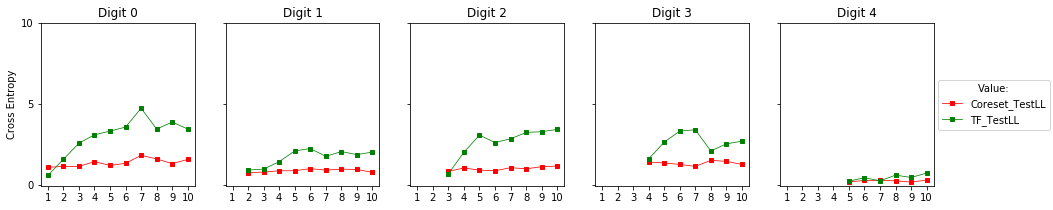

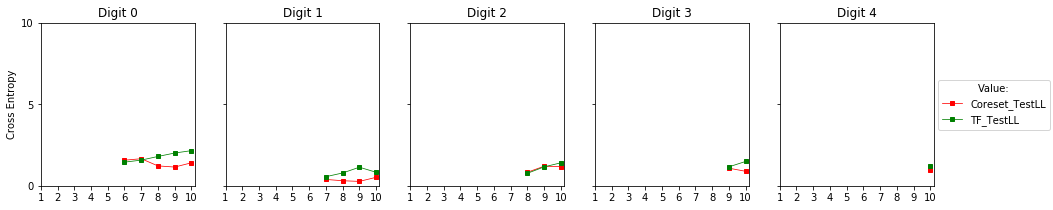

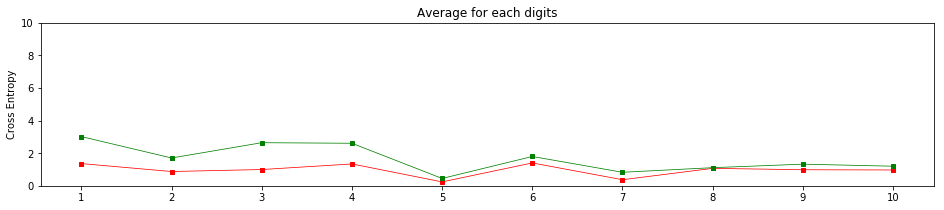

In [20]:
x = np.arange(1,11)

test_ll = eval(open('coreset_cla_unc.txt',mode='r').read())
test_ll_tf = np.load(tf_directory+"mnist_TF.npy")[1]

mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 0.75

plt.clf()
g, ax1 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 5, figsize=(16,3), sharex=True,
                                                        sharey=True)
i, ax3  = plt.subplots(1, 1, figsize=(16,3), sharex=True,
                                                        sharey=True)

for i in range(5):

    ax1[i].plot(x[i:], test_ll[i], color = "r", marker = "s")
    ax1[i].plot(x[i:], test_ll_tf[i:,i], color = "g", marker = "s")
    ax1[i].set_title("Digit " + str(i))

    j = i + 5
    ax2[i].plot(x[j:], test_ll[j], color = "r",marker = "s")
    ax2[i].plot(x[j:], test_ll_tf[j:,j], color = "g",marker = "s")
    ax2[i].set_title("Digit " + str(i))
    
for i in range(5):
    ax1[i].set_xticks(np.arange(1, 11, 1))
    ax1[i].set_yticks(np.arange(0, 11, 5))
    plt.ylim(0,10)
    ax2[i].set_xticks(np.arange(1, 11, 1))
    ax2[i].set_yticks(np.arange(0, 11, 5))
    plt.ylim(0,10)
    
test_ll_tf[test_ll_tf == 0] = np.nan

ax3.plot(x, [np.nanmean(x) for x in test_ll], color = "r", marker = "s")
ax3.plot(x, np.nanmean(test_ll_tf,0), color = "g", marker = "s")
ax3.set_title("Average for each digits")
ax3.set_ylabel("Cross Entropy")
ax3.set_xticks(np.arange(1,11,1))    
    
    
ax1[0].set_ylabel("Cross Entropy")
ax2[0].set_ylabel("Cross Entropy")
    
g.legend(   # The line objects
           labels=["Coreset_TestLL", "TF_TestLL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legendblack
           )
h.legend(   # The line objects
           labels=["Coreset_TestLL", "TF_TestLL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Value:"  # Title for the legend
           )
